In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Split dataset into class folders
import os
import shutil

# define the input directory containing the mixed images
input_dir = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/known_images"

# define the output directories for normal and sick images
normal_dir = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/Dataset/Normal"
sick_dir = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/Dataset/Infected"

# create the output directories if they don't already exist
os.makedirs(normal_dir, exist_ok=True)
os.makedirs(sick_dir, exist_ok=True)

# loop through all files in the input directory
for filename in os.listdir(input_dir):
    # check if the filename contains "normal"
    if "normal" in filename:
        # copy the file to the normal output directory
        shutil.copy(os.path.join(input_dir, filename), normal_dir)
    # check if the filename contains "sick"
    elif "sick" in filename:
        # copy the file to the sick output directory
        shutil.copy(os.path.join(input_dir, filename), sick_dir)
    else:
        # ignore files that don't contain "normal" or "sick"
        pass


In [ ]:
!pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Loading libraries
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.cm as cm
from IPython.display import Image, display

import numpy as np
import seaborn as sns
import pandas as pd
import random
import splitfolders

import os
import cv2
import PIL

import tensorflow as tf
import datetime
from tensorflow import keras
from keras import callbacks
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Splitting dataset into train, val and test set
splitfolders.ratio("/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/Dataset",output='data',seed=77,ratio=(0.7,0.15,0.15))

Copying files: 715 files [00:03, 230.40 files/s]


In [ ]:
# File directories
train_data_dir = 'data/train'
val_data_dir = 'data/val'
test_data_dir = 'data/test'

In [ ]:
# Creating image generator for augmentation of train set
train_image_gen  = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                      rotation_range=20,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      fill_mode='constant'
                                    )

In [ ]:
# Creating image generator for test set
test_image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
target_size = (224,224)
input_shape = (224,224,3)
learning_rate = 0.0001
epochs = 50
batch_size = 32
dropout = 0.5

In [ ]:
# Train set
train_generator = train_image_gen.flow_from_directory(train_data_dir,
                                                target_size=target_size,
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 499 images belonging to 2 classes.


In [ ]:
train_generator.__next__()[0][0].shape

(224, 224, 3)

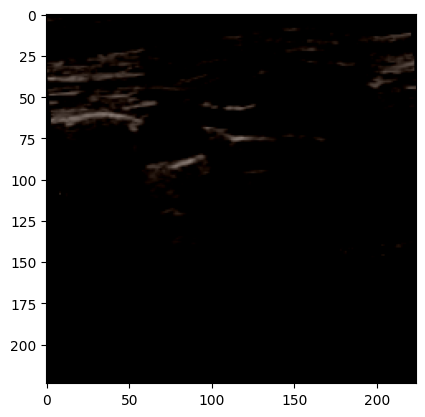

In [ ]:
plt.imshow(train_generator.__next__()[0][0]/255)

In [ ]:
train_generator.class_indices

{'Infected': 0, 'Normal': 1}

In [ ]:
# Validation set
val_generator =  test_image_gen.flow_from_directory(val_data_dir,
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True)

Found 106 images belonging to 2 classes.


In [ ]:
# Test set
test_generator = test_image_gen.flow_from_directory(test_data_dir,
                                               target_size=target_size,
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 110 images belonging to 2 classes.


In [ ]:
# Building model
resnet_50 = tf.keras.applications.ResNet50(include_top=False,
                                           weights="imagenet",
                                           input_tensor=None,
                                           input_shape=input_shape,
                                           pooling='max',
                                       )
# Every layer in resnet_50 is not going to be trainable
# Freezing layers saves time complexity in the training process
for layer in resnet_50.layers:
  layer.trainable=False


model = Dense(512,activation='relu')(resnet_50.output)
model = Dropout(0.5)(model)
model = Dense(1,activation='sigmoid')(model)
model = Model(inputs=resnet_50.input,outputs=model)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Compiling model
model.compile(optimizer=Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Model Training
model.fit(train_generator,validation_data=val_generator,epochs=epochs)

Epoch 1/50
16/16 [==============================] - 22s 577ms/step - loss: 2.7950 - accuracy: 0.5531 - val_loss: 0.7923 - val_accuracy: 0.7830
Epoch 2/50
16/16 [==============================] - 6s 394ms/step - loss: 1.3103 - accuracy: 0.7455 - val_loss: 0.4333 - val_accuracy: 0.9245
Epoch 3/50
16/16 [==============================] - 6s 393ms/step - loss: 0.7872 - accuracy: 0.8236 - val_loss: 0.4961 - val_accuracy: 0.8962
Epoch 4/50
16/16 [==============================] - 8s 480ms/step - loss: 0.6210 - accuracy: 0.8557 - val_loss: 0.4479 - val_accuracy: 0.9151
Epoch 5/50
16/16 [==============================] - 7s 420ms/step - loss: 0.4838 - accuracy: 0.8898 - val_loss: 0.4429 - val_accuracy: 0.9151
Epoch 6/50
16/16 [==============================] - 7s 437ms/step - loss: 0.4812 - accuracy: 0.8938 - val_loss: 0.4353 - val_accuracy: 0.9434
Epoch 7/50
16/16 [==============================] - 8s 492ms/step - loss: 0.3400 - accuracy: 0.9078 - val_loss: 0.3564 - val_accuracy: 0.9434
Epoch

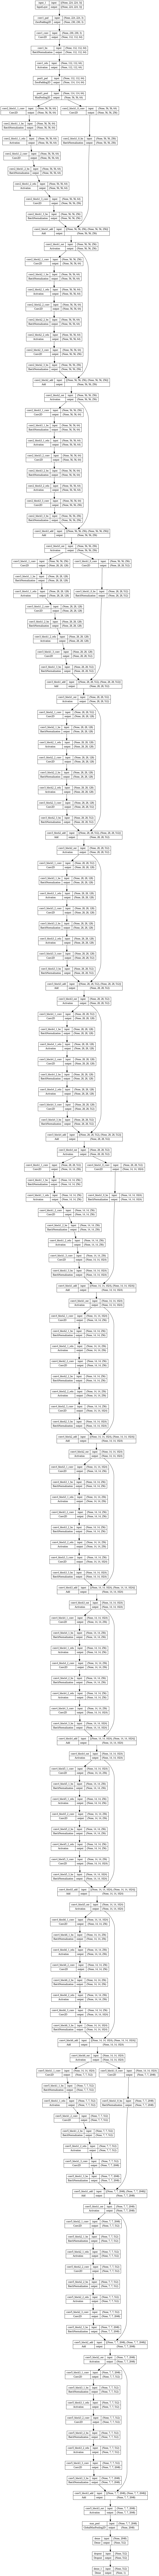

In [ ]:
tf.keras.utils.plot_model(model, show_layer_names=True, show_shapes=True)

In [ ]:
model.save('/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/model.h5')

# Visualization

In [ ]:
# Storing model history of performance within variable 'metrics'
metrics = pd.DataFrame(model.history.history)

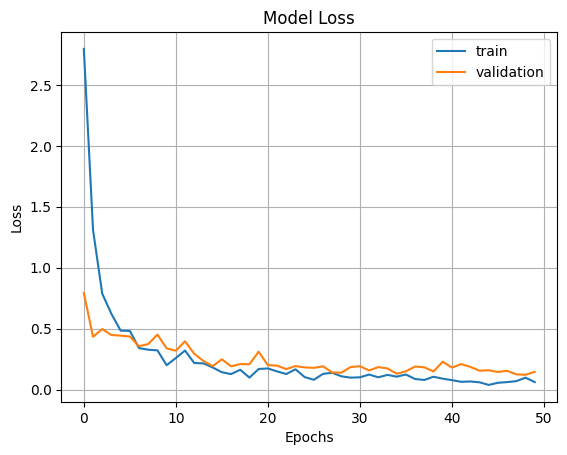

In [ ]:
# Plot of train set loss and validation set loss
metrics[['loss','val_loss']].plot()
# Labelling Graph
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

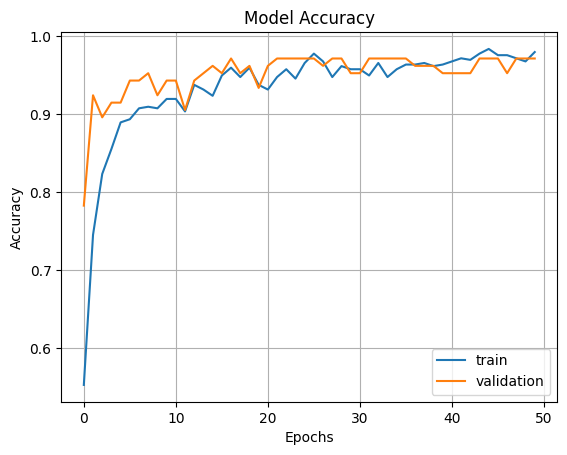

In [ ]:
# Plot of train set accuracy and validation set accuracy
metrics[['accuracy','val_accuracy']].plot()
# Labelling Graph
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

# Model Evaluation

In [ ]:
# Predictions on test set
pred = model.predict(test_generator)
predictions = pred > 0.5

4/4 [==============================] - 2s 329ms/step


In [ ]:
target_names = ['INFECTED','NORMAL']
print(classification_report(test_generator.classes,predictions,target_names=target_names))

              precision    recall  f1-score   support

    INFECTED       0.96      0.98      0.97        54
      NORMAL       0.98      0.96      0.97        56

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110



In [ ]:
# Creating dataframe for confusion matrix
cm = confusion_matrix(test_generator.classes,predictions)
cm_df = pd.DataFrame(cm,
                     index = target_names,
                     columns = target_names)

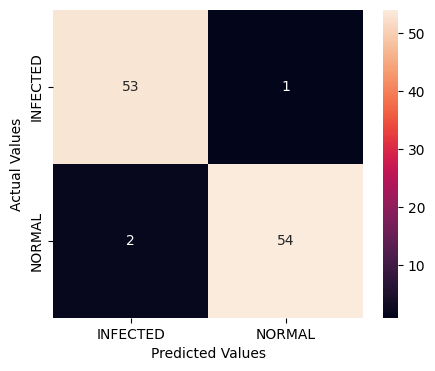

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
#plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Explainability using GradCAM

# Sample Data

In [ ]:
sample_data_dir = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images"

In [ ]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = preprocess_input(array)
    array = np.expand_dims(array, axis=0)
    return array

In [ ]:
img_path = sample_data_dir + '/35.png'
input = get_img_array(img_path, (224,224))

In [ ]:
# Predictions on test set
pred = model.predict(input)
predictions = pred > 0.5

1/1 [==============================] - 2s 2s/step


In [ ]:
predictions

array([[ True]])

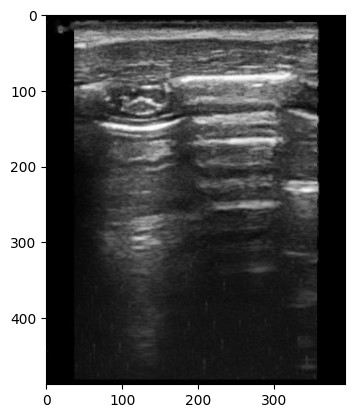

In [ ]:
im = plt.imread(img_path)
plt.imshow(im,cmap='gray')

In [ ]:
# Model Explainability
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = preprocess_input(array)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, pred_index=None):

      grad_model = tf.keras.models.Model(
                                  [model.get_layer('input_1').input], 
                                  [model.get_layer("conv5_block3_out").output,
                                  model.output]
                                        )
      print(grad_model.outputs)
      with tf.GradientTape() as tape:
          last_conv_layer_output, preds = grad_model(img_array)
          print("preds:",preds[0])
          if pred_index is None:
              pred_index = tf.argmax(preds[0])
          print("pred_index:",pred_index)
          class_channel = preds[:, pred_index]
          print("class_channel:",class_channel)


      grads = tape.gradient(class_channel, last_conv_layer_output)


      pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

      last_conv_layer_output = last_conv_layer_output[0]
      heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
      heatmap = tf.squeeze(heatmap)

    #For visualization purpose,we will also normalize the heatmap between 0 & 1
      heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
      return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=5):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Save the heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap * alpha)
    jet_heatmap.save('heatmap.jpg')

    # Display Grad CAM
    display(Image(cam_path))


[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([0.9880391], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([0.9880391], shape=(1,), dtype=float32)


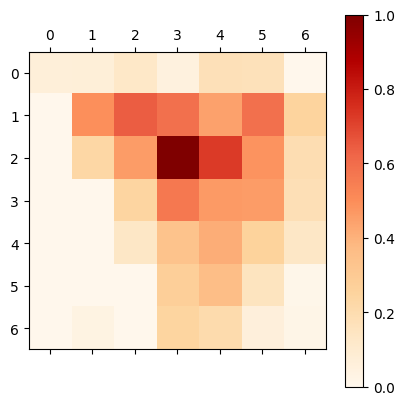

In [ ]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(input, model)

# Display heatmap
plt.matshow(heatmap,cmap='OrRd')
plt.colorbar()
plt.show()

<ipython-input-36-b2c35ca37b83>:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


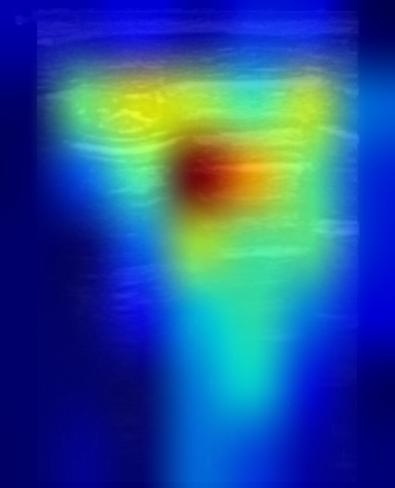

In [ ]:
import matplotlib.cm as cm
save_and_display_gradcam(img_path, heatmap)

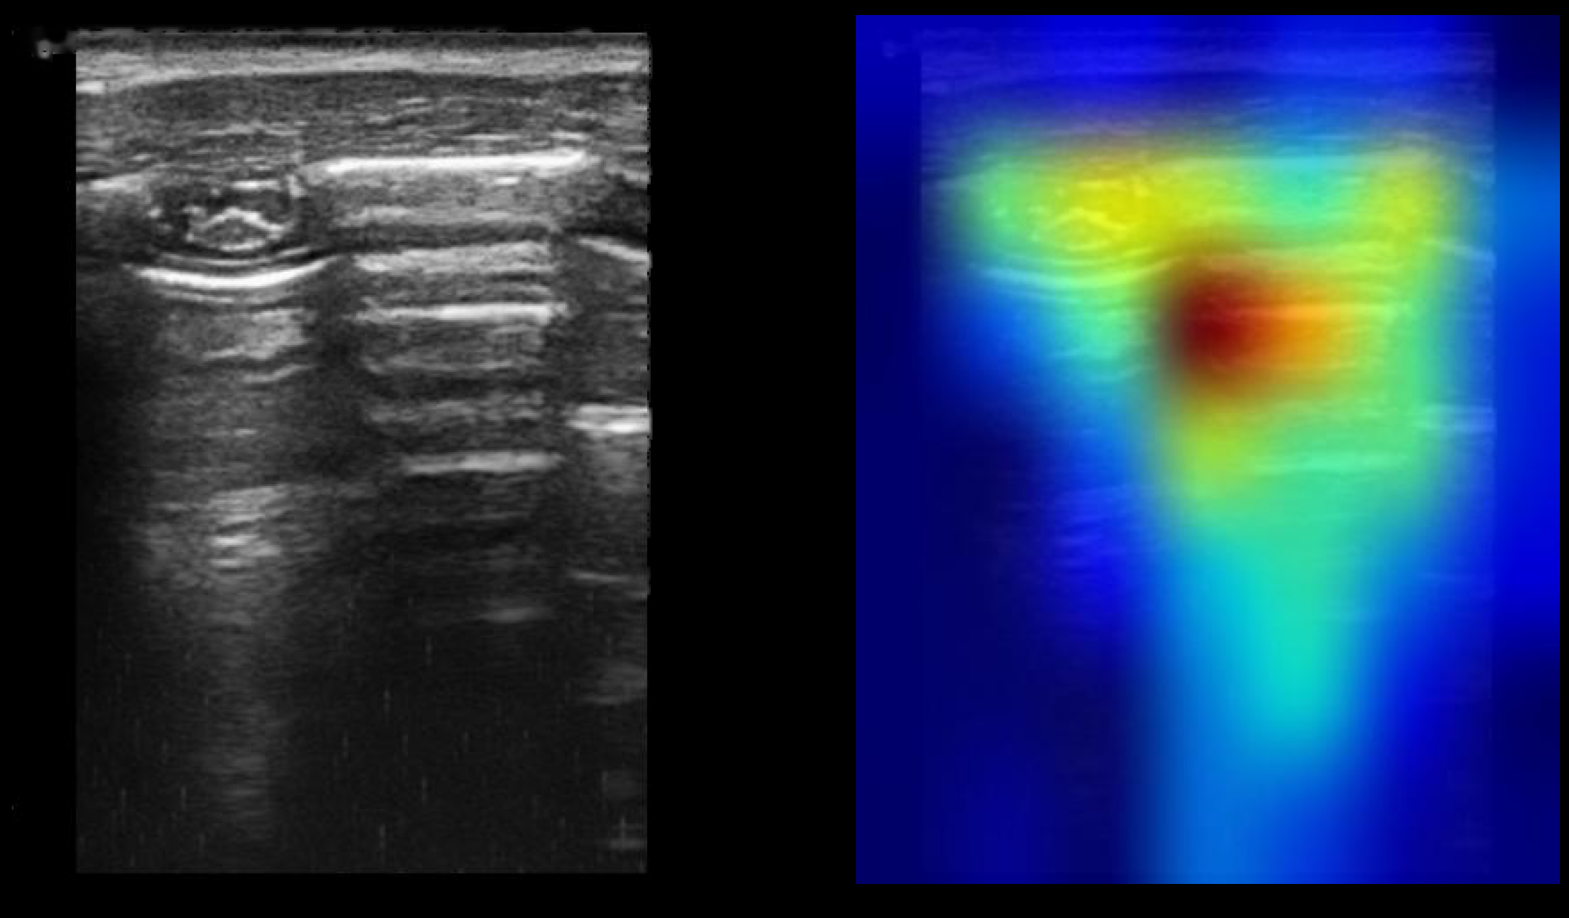

In [ ]:
plt.figure(figsize=(20,20),facecolor='black')

plt.subplot(1,2,1)
img = plt.imread(img_path)
plt.imshow(img,cmap='gray')
plt.grid(False)
plt.axis('off')

plt.subplot(1,2,2)
im = plt.imread("cam.jpg")
plt.imshow(im)
plt.grid(False)
plt.axis('on')

plt.show()

1/1 [==============================] - 0s 36ms/step
[[False]]
[<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]
preds: tf.Tensor([-13.392103], shape=(1,), dtype=float32)
pred_index: tf.Tensor(0, shape=(), dtype=int64)
class_channel: tf.Tensor([-13.392103], shape=(1,), dtype=float32)


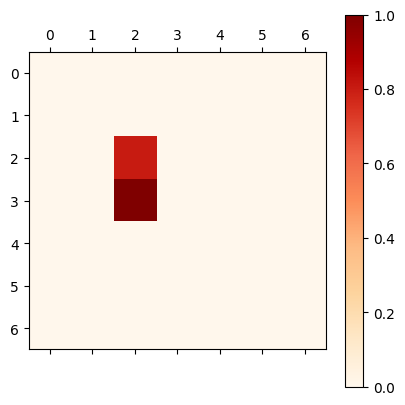

In [ ]:
# Loading image folder path
gen_dir = test_data_dir + '/Infected/'

# Obtaining random image name from image folder
img_name = random.choice(os.listdir(gen_dir))

# Joining image folder path and image name
img_path = os.path.join(gen_dir, img_name)

# Load image using path
img = tf.keras.preprocessing.image.load_img(img_path)

# Save original image
img.save('original.jpg')

# Prepare image
img_array = get_img_array(img_path, size=(224, 224))

# Remove last layer's sigmoid
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
prediction = preds > 0.5
print(prediction)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model)

# Display heatmap
plt.matshow(heatmap,cmap='OrRd')
plt.colorbar()
plt.show()

<ipython-input-36-b2c35ca37b83>:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


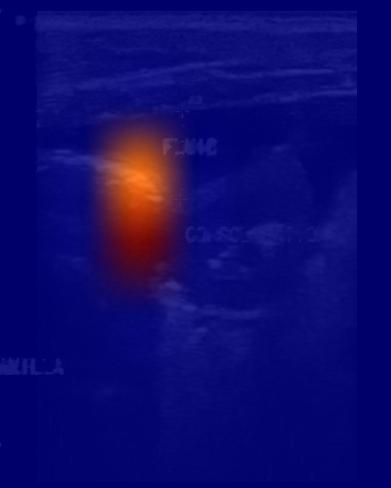

In [ ]:
import matplotlib.cm as cm
save_and_display_gradcam(img_path, heatmap)

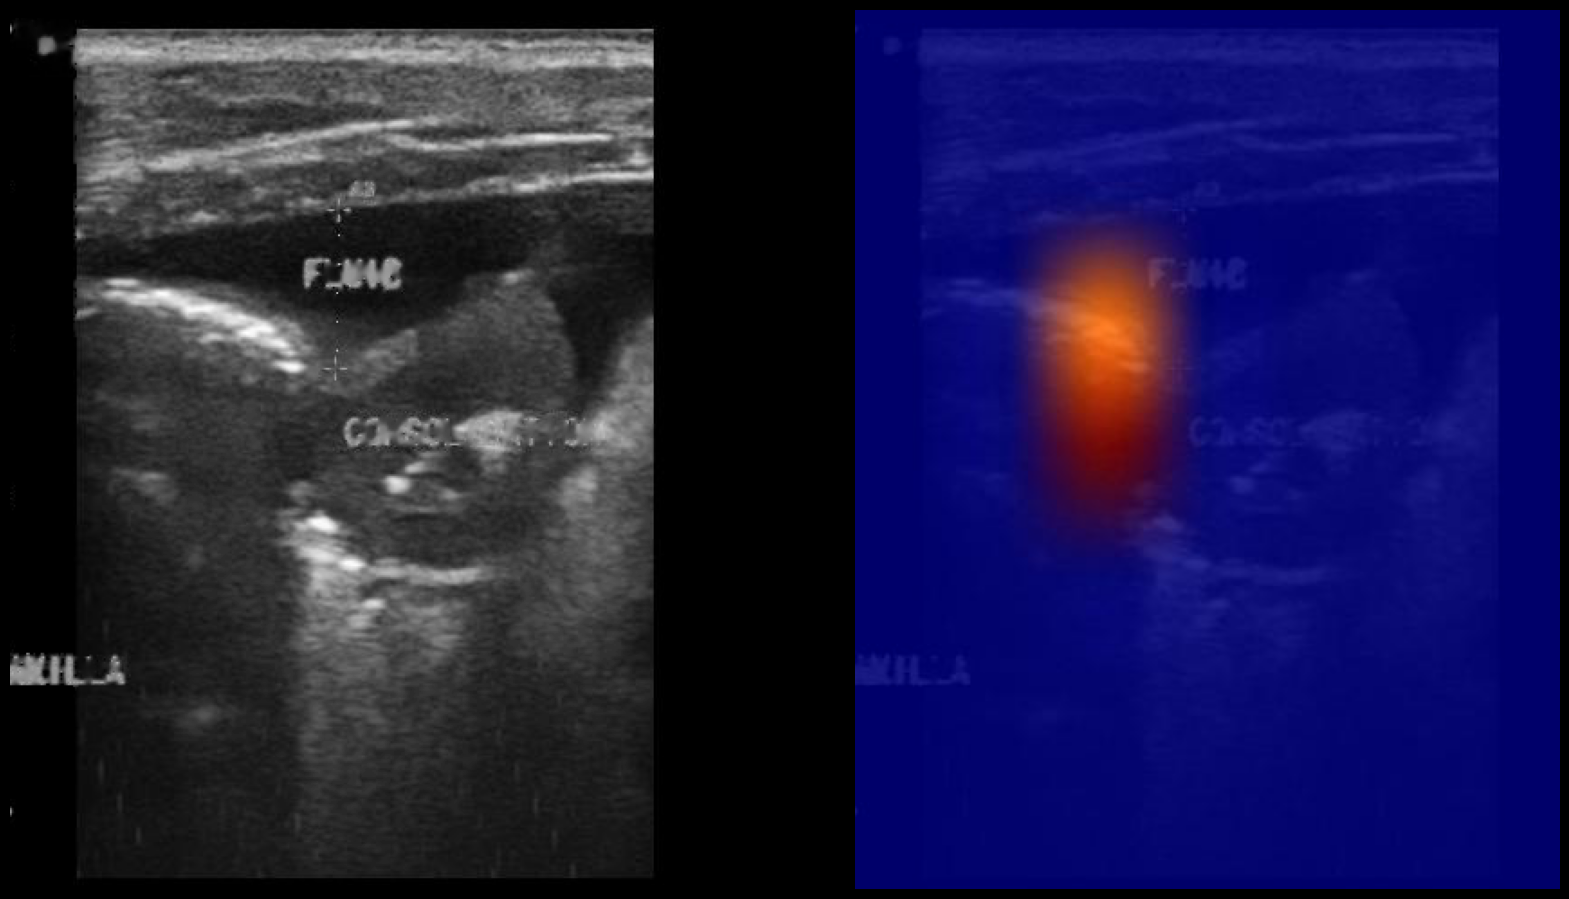

In [ ]:
plt.figure(figsize=(20,20),facecolor='black')

plt.subplot(1,2,1)
img = plt.imread(img_path)
plt.imshow(img,cmap='gray')
plt.grid(False)
plt.axis('off')

plt.subplot(1,2,2)
im = plt.imread("cam.jpg")
plt.imshow(im)
plt.grid(False)
plt.axis('off')

plt.show()